In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
exited = df["Exited"].value_counts()
print("Yes: ",exited[1])
print("No: ",exited[0])

Yes:  2037
No:  7963


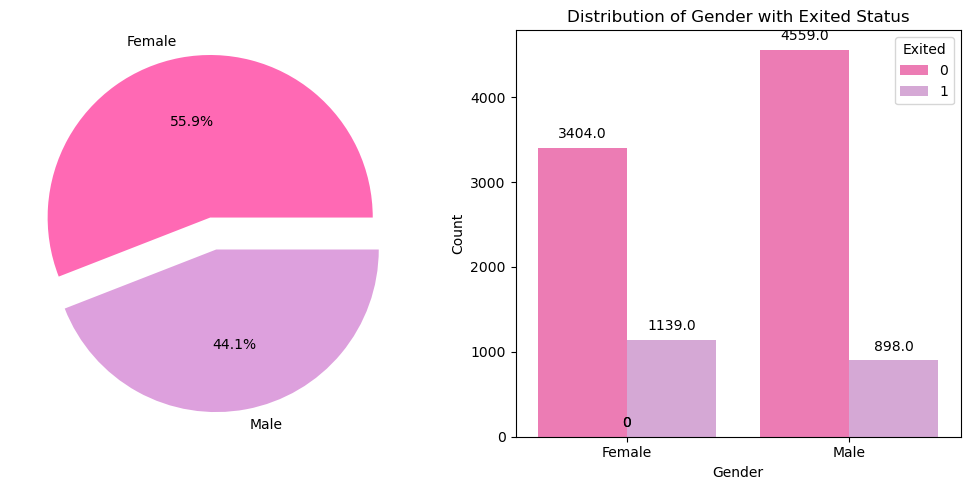

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axb = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
pie_colors = ['#ff69b4', '#dda0dd']  
bar_palette = ['#ff69b4', '#dda0dd'] 
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].sum().plot.pie(explode=explode, autopct="%1.1f%%", 
                                              colors=pie_colors, ax=axb[0])
axb[0].set_ylabel("")  
ax = sns.countplot(x="Gender", hue="Exited", data=df, ax=axb[1], palette=bar_palette)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axb[1].set_title("Distribution of Gender with Exited Status")
axb[1].set_xlabel("Gender")
axb[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


<Axes: xlabel='Geography', ylabel='count'>

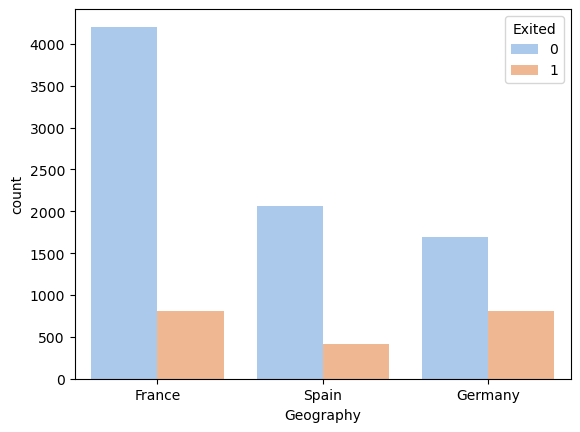

In [22]:
sns.countplot(x='Geography',hue='Exited',data=df, palette='pastel')

In [23]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
no= df[df["Exited"]==0]
yes = df[df["Exited"]==1]
no = resample(no, replace=False, n_samples=len(yes))
down_samples = pd.concat([yes, no], axis=0)
X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

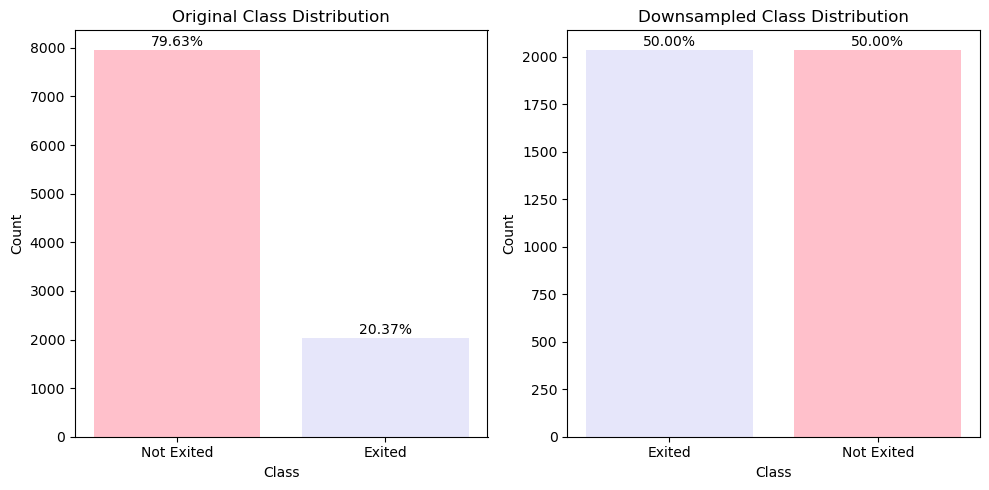

In [33]:
original_class_counts = df["Exited"].value_counts()
downsampled_class_counts = down_samples["Exited"].value_counts()
original_percentages = original_class_counts / len(df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['pink', 'lavender'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Not Exited', 'Exited'])
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['pink', 'lavender'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Exited', 'Exited'])
plt.tight_layout()
plt.show()

RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       372
           1       0.82      0.75      0.78       443

    accuracy                           0.77       815
   macro avg       0.77      0.78      0.77       815
weighted avg       0.78      0.77      0.77       815

Random Forest model accuracy is: 77.42%


LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       372
           1       0.74      0.71      0.72       443

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.71      0.70      0.70       815

Logistic Regression accuracy is: 70.43%


GRADIENT BOOSTING

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
gb_accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting accuracy is: {:.2f}%'.format(gb_accuracy * 100))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       372
           1       0.82      0.75      0.79       443

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815

Gradient Boosting accuracy is: 77.79%


In [46]:
import pandas as pd
Algorithms = ['Gradient Boosting', 'Random Forest', 'Logistic Regression']
accuracy = [gb_accuracy, RF_accuracy, LR_accuracy]  
final_result = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': accuracy})
print(final_result)

             Algorithm  Accuracy
0    Gradient Boosting  0.777914
1        Random Forest  0.774233
2  Logistic Regression  0.704294


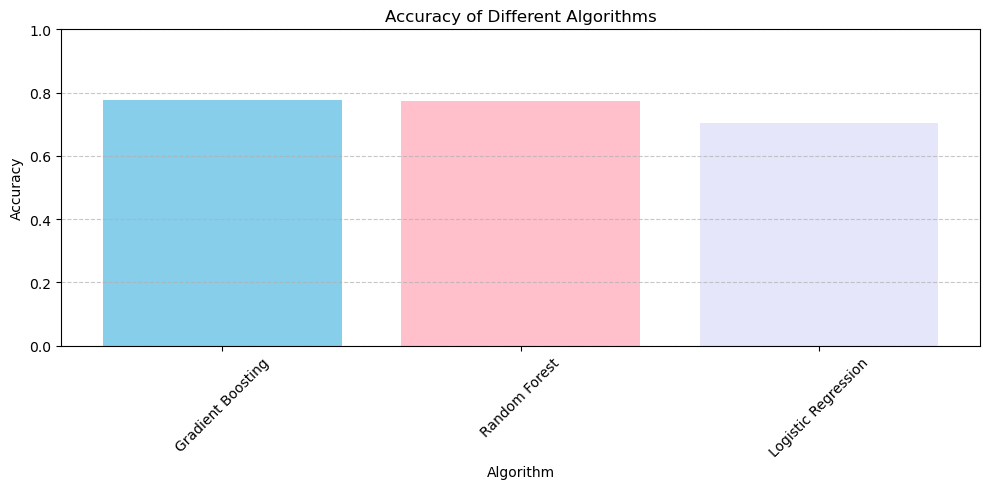

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
Algorithms = ['Gradient Boosting', 'Random Forest', 'Logistic Regression']
accuracy = [gb_accuracy, RF_accuracy, LR_accuracy] 
FinalResult = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': accuracy})
plt.figure(figsize=(10, 5))
colors = ['skyblue', 'pink', 'lavender']  
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors[:len(FinalResult)])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()